# Open Ocean
# Open Earth Fundation
---------------------------------------------------------------------------------------------------------------------
Authors: Margaux Filippi & Maureen Fonseca

---------------------------------------------------------------------------------------------------------------------

<h1> Step 1: curate the IUCN data in the Eastern Tropical Pacific </h1>

This notebook shows the first step in getting:
- species distribution
- species statuses

and the pre-processing that goes along with it. 

<h1> Data sources </h1>

<h2> Species information </h2>

Unfortunately, at this time, this data needs to be manually downloaded by making a request to IUCN.

<h2> Geospatial information </h2>

A lot of the geospatial shapefiles have been manually created and curated. They can be found on our [Google Drive](https://drive.google.com/drive/folders/14vgeAvyzWkmSrUPFOJdJGPFg4Cpw28HK?usp=sharing) under:

`Ocean Program > data > data_processed > Geospatial_data`

<h2> Data needed for this project </h2>

This data has been gathered on our [Google Drive](https://drive.google.com/drive/folders/1-C2qlKBRopzs1p8h8ZyUKKJCZby4zguZ?usp=sharing) under a temporary folder that accompagnies the GitHub repository: 

`Ocean Program > data > to download for gh > ACMC_IUCN_data`

# Loading libraries:

In [1]:
import geopandas as gpd

/Users/maureenfonseca/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
import glob

In [4]:
from shapely.geometry import Polygon, Point

In [5]:
import fiona; #help(fiona.open)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import timeit

---------------------------------------------------------------------------------------------------------------------
OEF functions

---------------------------------------------------------------------------------------------------------------------

In [8]:
from marinebiodiversity_utils import *

<h1> 1. Get the conservation area, i.e. the area of interest </h1>

---------------------------------------------------------------------------------------------------------------------
<h3> Cocos Island Coordinates </h3>

Cocos Island is located at 05°31′41″N; 87°03′40″W

---------------------------------------------------------------------------------------------------------------------

In [9]:
Cocos_lat = 5+31/60+41/3600
Cocos_lon = -(87+3/60+40/3600)

In [10]:
Cocos = Point(Cocos_lon, Cocos_lat)

<h3> Import entire ACMC, AMMB, PNIC shapefiles </h3>

In [12]:
ACMC = gpd.read_file('../../ACMC/ACMC.shp')
AMMB = gpd.read_file('../../ACMC/AMMB.shp')
PNIC = gpd.read_file('../../ACMC/PNIC.shp')

---------------------------------------------------------------------------------------------------------------------
Inspect the files and their Coordinate Reference Systems (CRS).

---------------------------------------------------------------------------------------------------------------------

In [12]:
ACMC

,codigo,nombre_asp,cat_manejo,estatus,siglas_cat,nombre_ac,siglas_ac,descripcio,a_creacion,n_creacion,area,area_km,version,geometry
0,A01,Montes Submarinos,Area Marina de Manejo,Estatal,AMM,Marina Cocos,ACMC,Area Marina de Manejo,2022,DE-43368-MINAE,1.062837e+07,106283.651423,2022-5-4-001,"POLYGON ((-86.03201 6.57101, -86.03401 2.31691..."


In [14]:
AMMB

,codigo,nombre_asp,cat_manejo,estatus,siglas_cat,nombre_ac,siglas_ac,descripcio,a_creacion,n_creacion,area,area_km,version,geometry
0,A01,Montes Submarinos,Area Marina de Manejo,Estatal,AMM,Marina Cocos,ACMC,Area Marina de Manejo,2022,DE-43368-MINAE,1.062837e+07,106283.651423,2022-5-4-001,"POLYGON ((275250.230 727000.412, 273733.222 25..."


In [15]:
PNIC

,codigo,nombre_asp,cat_manejo,estatus,siglas_cat,nombre_ac,siglas_ac,descripcio,a_creacion,n_creacion,area,area_km,version,geometry
0,P20,Isla del Coco,Parque Nacional,Estatal,PN,Marina Cocos,ACMC,Area marina protegida,2022,DE-43368-MINAE,5.482085e+06,54820.849784,2022-5-4-001,"POLYGON ((237274.683 501181.437, -54070.326 50..."


---------------------------------------------------------------------------------------------------------------------
Let's check the coordinate reference system:

---------------------------------------------------------------------------------------------------------------------

In [20]:
AMMB.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
PNIC.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

---------------------------------------------------------------------------------------------------------------------
Change the CRS if needed. Note: WGS 84 is CRS 4326.

---------------------------------------------------------------------------------------------------------------------

In [23]:
PNIC_WGS84 = PNIC.to_crs(crs=4326)
AMMB_WGS84 = AMMB.to_crs(crs=4326)
ACMC = ACMC.set_crs(epsg=4326, allow_override=True)

In [25]:
ACMC.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Plot to visually inspect the data.

In [26]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

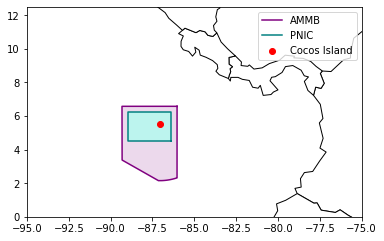

In [27]:
fig, ax = plt.subplots()

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')

AMMB_WGS84.plot(ax=ax, alpha = 0.15, color = 'purple')
x, y = AMMB_WGS84.geometry.item().exterior.xy
plt.plot(x,y, c = 'purple', label = 'AMMB')

PNIC_WGS84.plot(ax=ax, alpha = 0.35, color = 'turquoise')
x, y = PNIC_WGS84.geometry.item().exterior.xy
plt.plot(x,y, c = 'teal', label = 'PNIC')

ax.scatter(Cocos.x, Cocos.y, c = 'r', label = 'Cocos Island')

ax.set_xlim((-95, -75))
ax.set_ylim((0, 12.5))
ax.legend();
plt.show();

In [28]:
print("Area, PNIC:")
print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nArea, AMMB:")
print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

print("\nTotal Area, ACMC:")
print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")
print("{:,.2f}".format(AMMB_WGS84.to_crs(crs=31970).area.item()*10**(-6) + PNIC_WGS84.to_crs(crs=31970).area.item()*10**(-6)) + " sqkm in CRS 31970.")

Area, PNIC:
4.47 sqdeg.
54,799.50 sqkm in CRS 31970.

Area, AMMB:
8.66 sqdeg.
106,243.90 sqkm in CRS 31970.

Total Area, ACMC:
13.13 sqdeg.
161,043.41 sqkm in CRS 31970.


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/2915868912.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(PNIC_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/2915868912.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item()) + " sqdeg.")
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/2915868912.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print("{:0.2f}".format(AMMB_WGS84.area.item() + PNIC_WGS84.area.item()) + " sqdeg.")

<h1> 2. Get the species data </h1>

<h2> 2.1 Data gathering for the distribution range</h2>

This first step is the pre-processing to combine the ~7GB data downloaded from IUCN into a single shapefile that only covers the species within the AMMB. 

The outcome of this step has been saved in `AMMB_IUCN_data` under `gdf_species_in_AMMB.shp`.


---------------------------------------------------------------------------------------------------------------------
List all of the .shp files.

---------------------------------------------------------------------------------------------------------------------

In [32]:
source_dir = '../../ACMC_IUCN_data/IUCN_centralPacific_ranges/'
fnames = np.sort(glob.glob(source_dir + "/*.shp"))
print(fnames)

['../../ACMC_IUCN_data/IUCN_centralPacific_ranges/data_0.shp'
 '../../ACMC_IUCN_data/IUCN_centralPacific_ranges/data_1.shp'
 '../../ACMC_IUCN_data/IUCN_centralPacific_ranges/data_2.shp'
 '../../ACMC_IUCN_data/IUCN_centralPacific_ranges/data_3.shp'
 '../../ACMC_IUCN_data/IUCN_centralPacific_ranges/data_4.shp']


<h3> Turn the IUCN data into a geopandas dataframe </h3>

Why we can't ~~have anything nice~~ have species info from `data_3.shp` (and let's investigate if the file is corrupted) (...past)

Now, we have already 5 shapefiles with nice species :D

Let's see:

In [50]:
for fname in [fnames[0],fnames[1],fnames[2],fnames[3],fnames[4]]:
    print("NaN for species names in " + fname + ":")
    print(gpd.read_file(fname)['BINOMIAL'].isnull().values.any())

NaN for species names in ../../../raw/data_1.shp:
False
NaN for species names in ../../../raw/data_0.shp:
False
NaN for species names in ../../../raw/data_2.shp:
False
NaN for species names in ../../../raw/data_3.shp:
False
NaN for species names in ../../../raw/data_4.shp:
False


---------------------------------------------------------------------------------------------------------------------
Start with the first data file to get column headers.

---------------------------------------------------------------------------------------------------------------------

In [33]:
fname = fnames[0]
fname

'../../ACMC_IUCN_data/IUCN_centralPacific_ranges/data_0.shp'

In [34]:
gdf = gpd.read_file(fname)

In [35]:
print("The dataframe has " + str(len(gdf)) + " rows.")

The dataframe has 2740 rows.


In [36]:
df1 = gpd.GeoDataFrame(columns = gdf.columns)

In [37]:
df1

,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,geometry


<h3> Overlap with ACMC </h3>

We now want to filter the dataframe to only keep rows that overlap with our area of interest, `Cocos_A`.

Note: there are some rows in `gdf` that cause *issues* with a boolean filtering. Thus doing

`df[df.overlaps(Cocos_A)]` or `df.loc[:][df.loc[:].overlaps(Cocos_A)]`

gives the following error:
```
TopologicalError: The operation 'GEOSOverlaps_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.multipolygon.MultiPolygon object at 0x16b4b0880>
```

To avoid so, add `.buffer(0)`. It takes a longtime, however.


We thus execute a for-loop over `gdf` to extract the rows that overlap with `Cocos_A`.

See the python notebook / html file on data wrangling for this project. 

---------------------------------------------------------------------------------------------------------------------
Run the next cell only for AMMB and later for PNIC for all the 0..4 files

---------------------------------------------------------------------------------------------------------------------

In [39]:
area_of_conservation = ACMC.geometry.item()

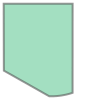

In [47]:
area_of_conservation

In [41]:
start = timeit.timeit()
print("We start with a df of length " + str(len(gdf)))
for idj in range(0, len(gdf)):
    try:
        if gdf.loc[idj].geometry.overlaps(area_of_conservation):
            df1 = df1.append(gdf.loc[idj])
    except:
        try:
            if gdf.loc[idj].geometry.buffer(0).overlaps(area_of_conservation):
                df1 = df1.append(gdf.loc[idj])
        except:
            print("Issue at row " + str(idj))
            pass
end = timeit.timeit()    
print("We end with a df of length " + str(len(df1)) + " and it took:")
print(end - start)

We start with a df of length 2740


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

TopologyException: side location conflict at 124.04621880000002 12.356638832000044
TopologyException: side location conflict at 124.04621880000002 12.356638832000044
TopologyException: side location conflict at 124.04621880000002 12.356638832000044
TopologyException: side location conflict at 121.37821955978495 12.296638531842802
TopologyException: side location conflict at 134.28704826036903 34.703750611801354
TopologyException: side location conflict at 152.50860593841344 -8.9941387476050636
TopologyException: side location conflict at 134.28704826036903 34.703750611801354
TopologyException: side location conflict at 121.37821955978495 12.296638531842802
TopologyException: side location conflict at 121.37821955978495 12.296638531842802
TopologyException: side location conflict at 121.37821955978495 12.296638531842802
TopologyException: side location conflict at 104.48288726833283 0.23991666772008102
TopologyException: side location conflict at 121.37821955978495 12.296638531842802
To

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at 124.04621880000002 12.356638832000044
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at -83.039388957034703 29.166687312069826
TopologyException: side location conflict at 124.04621880000002 12.356638832000044
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureW

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3825609194.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/fol

We end with a df of length 370 and it took:
-0.002100166000673198


---------------------------------------------------------------------------------------------------------------------
Now we append the rest of the files in fnames.

---------------------------------------------------------------------------------------------------------------------

In [42]:
for fname in fnames[1:]:
    gdf = gpd.read_file(fname)
    print("The dataframe has " + str(len(gdf)) + " rows.")
    print(gdf.crs)
    start = timeit.timeit()
    
    for idj in range(0, len(gdf)):
        try:
            if gdf.loc[idj].geometry.overlaps(area_of_conservation):
                df1 = df1.append(gdf.loc[idj])
        except:
            try:
                if gdf.loc[idj].geometry.buffer(0).overlaps(area_of_conservation):
                    df1 = df1.append(gdf.loc[idj])
            except:
                print("Issue at row " + str(idj))
                pass
    end = timeit.timeit()    
    print("We end with a df of length " + str(len(df1)) + " and it took:")
    print(end - start)

The dataframe has 487 rows.
epsg:4326


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at 124.04621880000002 12.356638832000044
TopologyException: side location conflict at 104.48288726833283 0.23991666772008102
TopologyException: side location conflict at 124.04621880000002 12.356638832000044
Top

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at -6.2754721319999476 56.48119353800007
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at 124.04621880000002 12.356638832000044
TopologyException: side location conflict at 144.23852539000006 -3.8205277929999397
/va

We end with a df of length 406 and it took:
-0.004217207998408412
The dataframe has 375 rows.
epsg:4326


TopologyException: side location conflict at 104.48288726833283 0.23991666772008102
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var

We end with a df of length 455 and it took:
-0.013307708000866114
The dataframe has 294 rows.
epsg:4326


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at -90.783683814999961 29.12966160700006
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at 94.682723940000074 16.297832431000074
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at 104.4828872672939 0.23991666817607893
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

We end with a df of length 548 and it took:
-0.007712332000664901
The dataframe has 144 rows.
epsg:4326


/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var

/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at -90.710830619999967 29.056089429000053
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

TopologyException: side location conflict at 121.65636438000001 28.403499692000025
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at -90.691993795999963 29.146215516000041
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/3427498241.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(gdf.loc[idj])
TopologyException: side location conflict at -90.783683818999975 29.129661626000029
To

We end with a df of length 627 and it took:
-0.000358418001269456


In [43]:
type(df1)

geopandas.geodataframe.GeoDataFrame

In [44]:
len(df1)

627

In [45]:
df1.head()

,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,geometry
13,1504292.0,177964.0,Ctenochaetus marginatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((173.90343 3.44131, 173.90535 3..."
62,1604964.0,180245.0,Holothuria kefersteinii,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-117.10683 32.44577, -117.1034..."
69,1614313.0,180318.0,Holothuria imitans,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((132.11722 -2.12133, 132.11264 ..."
76,1621878.0,180373.0,Isostichopus fuscus,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-114.81055 31.82298, -114.7885..."
95,1735660.0,183294.0,Strongylura exilis,1,1,1,IUCN,2018,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-91.24865 -0.67985, -91.24889 ..."


In [73]:
df1.head()

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,geometry
0,13,1504292.0,177964.0,Ctenochaetus marginatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((173.90343 3.44131, 173.90535 3..."
1,62,1604964.0,180245.0,Holothuria kefersteinii,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-117.10683 32.44577, -117.1034..."
2,69,1614313.0,180318.0,Holothuria imitans,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((132.11722 -2.12133, 132.11264 ..."
3,76,1621878.0,180373.0,Isostichopus fuscus,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-114.81055 31.82298, -114.7885..."
4,95,1735660.0,183294.0,Strongylura exilis,1,1,1,IUCN,2018,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-91.24865 -0.67985, -91.24889 ..."


In [48]:
df1.to_file('gdf_species_in_ACMC.shp') 

/Users/maureenfonseca/opt/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


`gdf_species_in_ACMC.shp` is the saved output. It is also on the Drive. It can be retrieved doing:

In [ ]:
#df = gpd.read_file("../../Data/ACMC_IUCN_data/gdf_species_in_ACMC.shp")

In [50]:
df1 = df1.reset_index()

In [51]:
print("There are " + str(len(df1)) + " unique species in this dataset.")
print("The dates span " + str(df1.YEAR.min()) + " to " + str(df1.YEAR.max()))

There are 627 unique species in this dataset.
The dates span 2004 to 2021


<h2> 2.2 Get the conservation status </h2>

This was also manually downloaded following a manual request to UICN.

In [52]:
stat = pd.read_csv('../../ACMC_IUCN_data/redlist_species_data_a5560fc7-ec95-45c9-8c1f-364584e4173d/assessments.csv')
stat.head()

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,...,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,495630,10030,Hexanchus griseus,Near Threatened,A2bd,2020,2019-11-21 00:00:00 UTC,3.1,English,<p>The&#160;Bluntnose Sixgill Shark (<em>Hexan...,...,Decreasing,"The Bluntnose Sixgill Shark has a widespread, ...","<p>The species is utilized for its meat, liver...",Marine,"<p>Since 2010, the European Union Fisheries Co...",NaN,NaN,False,False,Global
1,722731,155020,Anchoa walkeri,Least Concern,NaN,2020,2019-10-18 00:00:00 UTC,3.1,English,"<p>This coastal, marine and inshore species is...",...,Unknown,<p>This species occurs in the eastern central ...,<p>This species is likely an important compone...,Freshwater (=Inland waters)|Marine,No known species-specific conservation measure...,Nearctic|Neotropical,NaN,False,False,Global
2,723579,155051,Microgobius tabogensis,Least Concern,NaN,2019,2018-08-31 00:00:00 UTC,3.1,English,<p><em>Microgobius tabogensis </em>believed to...,...,Unknown,<em>Microgobius tabogensis</em> (Common name: ...,<em>Microgobius tabogensis</em> is not a utili...,Freshwater (=Inland waters)|Marine,There are no known species-specific conservati...,Nearctic|Neotropical,NaN,False,False,Global
3,725623,155130,Caranx sexfasciatus,Least Concern,NaN,2019,2018-12-13 00:00:00 UTC,3.1,English,<em>Caranx sexfasciatus</em> is a widely distr...,...,Decreasing,<em>Caranx sexfasciatus</em> is broadly distri...,This species is of varying importance to both ...,Freshwater (=Inland waters)|Marine,There are no species-specific conservation mea...,Afrotropical|Australasian|Indomalayan|Nearctic...,NaN,False,False,Global
4,887942,161403,Somniosus pacificus,Near Threatened,A2bd,2021,2019-08-29 00:00:00 UTC,3.1,English,The Pacific Sleeper Shark (<em>Somniosus pacif...,...,Decreasing,The Pacific Sleeper Shark occurs in the North ...,The liver oil is used but in most places the m...,Marine,In the Bering Sea and Aleutian Islands (BSAI) ...,NaN,NaN,False,False,Global


<h2> 2.3 Append conservation status to list of species & distribution </h2>

We make copies to be safe.

In [53]:
df = df1.copy()

In [54]:
df.head()

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,geometry
0,13,1504292.0,177964.0,Ctenochaetus marginatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((173.90343 3.44131, 173.90535 3..."
1,62,1604964.0,180245.0,Holothuria kefersteinii,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-117.10683 32.44577, -117.1034..."
2,69,1614313.0,180318.0,Holothuria imitans,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((132.11722 -2.12133, 132.11264 ..."
3,76,1621878.0,180373.0,Isostichopus fuscus,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-114.81055 31.82298, -114.7885..."
4,95,1735660.0,183294.0,Strongylura exilis,1,1,1,IUCN,2018,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-91.24865 -0.67985, -91.24889 ..."


In [55]:
df_nonan= df.copy()

In [56]:
df_nonan['BINOMIAL'].isnull().values.any()

False

In [57]:
#print("With nan's we have " + str(len(df)) + " rows.")
print("Without nan's we have " + str(len(df_nonan[~df_nonan['BINOMIAL'].isnull()])) + " rows.")

Without nan's we have 627 rows.


In [58]:
df_nonan = df_nonan[~df_nonan['BINOMIAL'].isnull()]

In [59]:
len(df_nonan)

627

In [60]:
df_nonan["redlistCategory"] = ""
df_nonan["scientificName"] = ""

In [61]:
scientificName = []
redlistCategory = []
for iter, row in df_nonan.iterrows():
    try:
        redlistCategory.append(stat[stat.scientificName==row.BINOMIAL].redlistCategory.item())
        scientificName.append(row.BINOMIAL)
    except:
        try:
            redlistCategory.append(stat[stat.scientificName==row.BINOMIAL].redlistCategory)
            scientificName.append(row.BINOMIAL)
        except:
            redlistCategory.append("No category found")
            scientificName.append(row.BINOMIAL)

In [62]:
df_nonan["redlistCategory"] = redlistCategory
df_nonan["scientificName"] = scientificName
df_nonan.head()

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,geometry,redlistCategory,scientificName
0,13,1504292.0,177964.0,Ctenochaetus marginatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((173.90343 3.44131, 173.90535 3...",Least Concern,Ctenochaetus marginatus
1,62,1604964.0,180245.0,Holothuria kefersteinii,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-117.10683 32.44577, -117.1034...",Data Deficient,Holothuria kefersteinii
2,69,1614313.0,180318.0,Holothuria imitans,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((132.11722 -2.12133, 132.11264 ...",Least Concern,Holothuria imitans
3,76,1621878.0,180373.0,Isostichopus fuscus,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-114.81055 31.82298, -114.7885...",Endangered,Isostichopus fuscus
4,95,1735660.0,183294.0,Strongylura exilis,1,1,1,IUCN,2018,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-91.24865 -0.67985, -91.24889 ...",Least Concern,Strongylura exilis


We just check:

In [63]:
(df_nonan.scientificName==df_nonan.BINOMIAL).unique()

array([ True])

We have the following conservation statuses:

In [64]:
df_nonan.redlistCategory.unique()

array(['Least Concern', 'Data Deficient', 'Endangered', 'Vulnerable',
       'Near Threatened', 'Critically Endangered'], dtype=object)

In [65]:
for status in df_nonan.redlistCategory.unique():
    print("There are " + str(len(df_nonan[df_nonan.redlistCategory==status])) + \
          " species with the status " + status)

There are 530 species with the status Least Concern
There are 31 species with the status Data Deficient
There are 16 species with the status Endangered
There are 37 species with the status Vulnerable
There are 10 species with the status Near Threatened
There are 3 species with the status Critically Endangered


In [66]:
print("The species with the status Critically Endangered are :")
print(df_nonan[df_nonan.redlistCategory=='Critically Endangered'].BINOMIAL)

The species with the status Critically Endangered are :
553    Carcharhinus longimanus
560     Eretmochelys imbricata
618            Pristis pristis
Name: BINOMIAL, dtype: object


- *Carcharhinus longimanus* is Oceanic whitetip shark
- *Eretmochelys imbricata* is Hawksbill sea turtle
- *Pristis pristis* is Largetooth sawfish

### Alternative approach to merging the DFs

In [91]:
# rename column
stat.rename(columns = {'internalTaxonId':'ID_NO'}, inplace=True)
stat.columns, df_nonan.columns

(Index(['assessmentId', 'ID_NO', 'scientificName', 'redlistCategory',
        'redlistCriteria', 'yearPublished', 'assessmentDate', 'criteriaVersion',
        'language', 'rationale', 'habitat', 'threats', 'population',
        'populationTrend', 'range', 'useTrade', 'systems',
        'conservationActions', 'realm', 'yearLastSeen', 'possiblyExtinct',
        'possiblyExtinctInTheWild', 'scopes'],
       dtype='object'),
 Index(['index', 'ASSESSMENT', 'ID_NO', 'BINOMIAL', 'PRESENCE', 'ORIGIN',
        'SEASONAL', 'COMPILER', 'YEAR', 'CITATION', 'LEGEND', 'SUBSPECIES',
        'SUBPOP', 'DIST_COMM', 'ISLAND', 'TAX_COMM', 'geometry',
        'redlistCategory', 'scientificName'],
       dtype='object'))

In [92]:
#Convert ID_NO from string to int
df_nonan[['ID_NO']] = df_nonan[['ID_NO']].apply(pd.to_numeric)
df_nonan.dtypes

index                 int64
ASSESSMENT           object
ID_NO               float64
BINOMIAL             object
PRESENCE             object
ORIGIN               object
SEASONAL             object
COMPILER             object
YEAR                 object
CITATION             object
LEGEND               object
SUBSPECIES           object
SUBPOP               object
DIST_COMM            object
ISLAND               object
TAX_COMM             object
geometry           geometry
redlistCategory      object
scientificName       object
dtype: object

In [93]:
ACMC_IUCN_df = df_nonan.merge(stat, on=['ID_NO'], how='left')

Check:

In [94]:
ACMC_IUCN_df.scientificName_x.equals(ACMC_IUCN_df.scientificName_y)

True

In [95]:
#Drop unused columns
drop_cols = ['redlistCriteria', 'yearPublished', 'assessmentDate', 'criteriaVersion',
       'language', 'rationale', 'habitat', 'threats', 'population','populationTrend', 'range', 'useTrade', 'systems',
       'conservationActions', 'realm', 'yearLastSeen', 'possiblyExtinct', 'possiblyExtinctInTheWild', 'scopes','scientificName_y','redlistCategory_y',
        'assessmentId']
ACMC_IUCN_df.drop(columns=drop_cols, inplace=True)

In [ ]:
# Now remove all geometries that are outside the ACMC -> clip does the job
#ACMC_IUCN_df1 = gpd.clip(ACMC_IUCN_df.set_crs(epsg=4326, allow_override=True), ACMC)

In [96]:
ACMC_IUCN_df.columns, len(ACMC_IUCN_df), ACMC_IUCN_df.dtypes

(Index(['index', 'ASSESSMENT', 'ID_NO', 'BINOMIAL', 'PRESENCE', 'ORIGIN',
        'SEASONAL', 'COMPILER', 'YEAR', 'CITATION', 'LEGEND', 'SUBSPECIES',
        'SUBPOP', 'DIST_COMM', 'ISLAND', 'TAX_COMM', 'geometry',
        'redlistCategory_x', 'scientificName_x'],
       dtype='object'),
 627,
 index                   int64
 ASSESSMENT             object
 ID_NO                 float64
 BINOMIAL               object
 PRESENCE               object
 ORIGIN                 object
 SEASONAL               object
 COMPILER               object
 YEAR                   object
 CITATION               object
 LEGEND                 object
 SUBSPECIES             object
 SUBPOP                 object
 DIST_COMM              object
 ISLAND                 object
 TAX_COMM               object
 geometry             geometry
 redlistCategory_x      object
 scientificName_x       object
 dtype: object)

In [97]:
ACMC_IUCN_df.head()

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,geometry,redlistCategory_x,scientificName_x
0,13,1504292.0,177964.0,Ctenochaetus marginatus,1,1,1,Jonnell Sanciangco,2010,International Union for Conservation of Nature...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((173.90343 3.44131, 173.90535 3...",Least Concern,Ctenochaetus marginatus
1,62,1604964.0,180245.0,Holothuria kefersteinii,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-117.10683 32.44577, -117.1034...",Data Deficient,Holothuria kefersteinii
2,69,1614313.0,180318.0,Holothuria imitans,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((132.11722 -2.12133, 132.11264 ...",Least Concern,Holothuria imitans
3,76,1621878.0,180373.0,Isostichopus fuscus,1,1,1,IUCN,2012,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-114.81055 31.82298, -114.7885...",Endangered,Isostichopus fuscus
4,95,1735660.0,183294.0,Strongylura exilis,1,1,1,IUCN,2018,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-91.24865 -0.67985, -91.24889 ...",Least Concern,Strongylura exilis


In [98]:
# ACMC_IUCN_df1.drop('index_left', inplace=True, axis=1)
ACMC_IUCN_df1 = ACMC_IUCN_df.reset_index(drop=True).sort_values(['ID_NO'])
ACMC_IUCN_df1

,index,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,geometry,redlistCategory_x,scientificName_x
573,46,50348265.0,2474.0,Balaenoptera acutorostrata,1,1,1,IUCN,2012,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((7.01220 58.06395, 7.01155 58.0...",Least Concern,Balaenoptera acutorostrata
616,102,130482064.0,2475.0,Balaenoptera borealis,1,1,1,IUCN,2012,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-81.46843 25.86530, -81.46493 ...",Endangered,Balaenoptera borealis
503,146,50349178.0,2476.0,Balaenoptera edeni,1,1,1,IUCN,2012,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((94.68272 16.29783, 94.66775 16...",Least Concern,Balaenoptera edeni
620,129,156923585.0,2477.0,Balaenoptera musculus,1,1,1,IUCN,2012,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((5.12308 60.65136, 5.13625 60.6...",Endangered,Balaenoptera musculus
23,401,2870736.0,3851.0,Carcharhinus limbatus,1,1,1,IUCN SSC Shark Specialist Group,2020,IUCN SSC Shark Specialist Group,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((115.04600 -33.54000, 115.04933...",Vulnerable,Carcharhinus limbatus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2581,141564391.0,141366592.0,Yarrella argenteola,1,1,1,GMSA,2019,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"POLYGON ((-85.81602 10.84466, -85.80835 10.844...",Least Concern,Yarrella argenteola
350,2591,141564596.0,141375168.0,Stomias atriventer,1,1,1,GMSA,2019,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"POLYGON ((-124.22341 40.76237, -124.22764 40.7...",Least Concern,Stomias atriventer
351,2592,141564601.0,141375242.0,Stomias colubrinus,1,1,1,GMSA,2019,International Union for Conservation of Nature,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-109.93708 22.87209, -109.9363...",Least Concern,Stomias colubrinus
354,2608,143613733.0,143613723.0,Scopelarchus stephensi,1,1,1,IUCN Marine Biodiversity Unit/GMSA,2019,IUCN Marine Biodiversity Unit/GMSA,Extant (resident),None,None,None,None,None,"MULTIPOLYGON (((-77.35555 3.89873, -77.38078 3...",Least Concern,Scopelarchus stephensi


<h1> 3. Saving output </h1>

Excellent! We save the final result as `gdf_ACMC_IUCN_range_status_filtered.shp` under `ACMCC_IUCN_data`. It is also on the Drive.

In [67]:
df_nonan.to_file('gdf_ACMC_IUCN_range_status_filtered.shp') 

/Users/maureenfonseca/opt/anaconda3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/v8/b0fnjf9d4q31sfz_8q4h4zxm0000gn/T/ipykernel_50512/1787830592.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_nonan.to_file('gdf_ACMC_IUCN_range_status_filtered.shp')
